In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.set()

plt.rcParams['figure.figsize'] = (12,6)

In [2]:
df = pd.read_csv('monday.csv', sep=';')

In [3]:
df.head()

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    4884 non-null   object
 1   customer_no  4884 non-null   int64 
 2   location     4884 non-null   object
dtypes: int64(1), object(2)
memory usage: 114.6+ KB


In [5]:
df.describe()

,customer_no
count,4884.000000
mean,718.274365
std,411.839636
min,1.000000
25%,366.000000
50%,720.000000
75%,1070.000000
max,1447.000000


In [6]:
df['date']= pd.to_datetime(df['timestamp'])
df['hour']= pd.to_datetime(df['timestamp'].astype(str)).dt.hour
df['minute']= pd.to_datetime(df['timestamp'].astype(str)).dt.minute
df.set_index('date', inplace= True)

In [7]:
df

,timestamp,customer_no,location,hour,minute
date,,,,,
2019-09-02 07:03:00,2019-09-02 07:03:00,1,dairy,7,3
2019-09-02 07:03:00,2019-09-02 07:03:00,2,dairy,7,3
2019-09-02 07:04:00,2019-09-02 07:04:00,3,dairy,7,4
2019-09-02 07:04:00,2019-09-02 07:04:00,4,dairy,7,4
2019-09-02 07:04:00,2019-09-02 07:04:00,5,spices,7,4
...,...,...,...,...,...
2019-09-02 21:49:00,2019-09-02 21:49:00,1442,checkout,21,49
2019-09-02 21:49:00,2019-09-02 21:49:00,1444,checkout,21,49
2019-09-02 21:49:00,2019-09-02 21:49:00,1445,dairy,21,49


### Calculate the total number of customers in each section

In [8]:

df['location'].value_counts()

checkout    1437
fruit       1005
dairy        895
drinks       797
spices       750
Name: location, dtype: int64

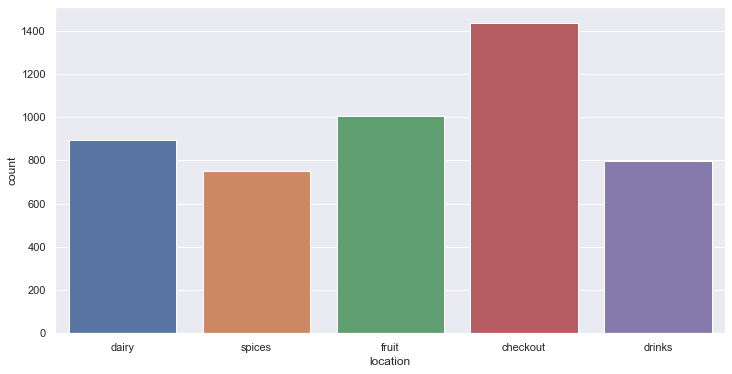

In [9]:
sns.countplot(x='location', data=df)

### Calculate the total numbers of customers in each sections over time

In [10]:
df

,timestamp,customer_no,location,hour,minute
date,,,,,
2019-09-02 07:03:00,2019-09-02 07:03:00,1,dairy,7,3
2019-09-02 07:03:00,2019-09-02 07:03:00,2,dairy,7,3
2019-09-02 07:04:00,2019-09-02 07:04:00,3,dairy,7,4
2019-09-02 07:04:00,2019-09-02 07:04:00,4,dairy,7,4
2019-09-02 07:04:00,2019-09-02 07:04:00,5,spices,7,4
...,...,...,...,...,...
2019-09-02 21:49:00,2019-09-02 21:49:00,1442,checkout,21,49
2019-09-02 21:49:00,2019-09-02 21:49:00,1444,checkout,21,49
2019-09-02 21:49:00,2019-09-02 21:49:00,1445,dairy,21,49


In [11]:
df1=df.groupby(['hour', 'customer_no', 'location']).sum()

In [12]:
df1


minute
hour customer_no location        
7    1           checkout       5
                 dairy          3
     2           checkout       6
                 dairy          3
     3           checkout       6
...                           ...
21   1444        checkout      49
                 spices        48
     1445        dairy         49
     1446        dairy         50
     1447        fruit         50

[4295 rows x 1 columns]

In [13]:
df1

minute
hour customer_no location        
7    1           checkout       5
                 dairy          3
     2           checkout       6
                 dairy          3
     3           checkout       6
...                           ...
21   1444        checkout      49
                 spices        48
     1445        dairy         49
     1446        dairy         50
     1447        fruit         50

[4295 rows x 1 columns]

In [14]:
df.groupby(['location','hour']).customer_no.count().unstack(0)

location,checkout,dairy,drinks,fruit,spices
hour,,,,,
7,92,59,60,54,52
8,112,68,65,68,51
9,85,50,57,76,40
10,90,58,35,47,52
11,55,36,24,41,33
12,73,55,37,54,46
13,120,76,50,95,71
14,90,58,43,64,50
15,94,67,48,79,54


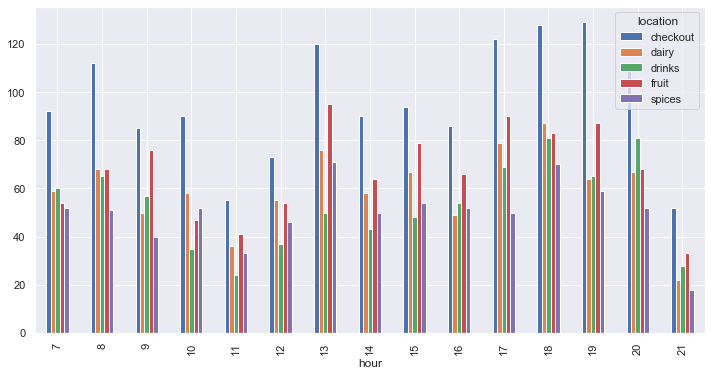

In [24]:
df.groupby(['location','hour']).customer_no.count().unstack(0).plot.bar()

### Display the number of customers at checkout over time

In [16]:
df_checkout= df.loc[df['location']== 'checkout']

In [17]:
df_checkout

,timestamp,customer_no,location,hour,minute
date,,,,,
2019-09-02 07:05:00,2019-09-02 07:05:00,1,checkout,7,5
2019-09-02 07:05:00,2019-09-02 07:05:00,5,checkout,7,5
2019-09-02 07:06:00,2019-09-02 07:06:00,2,checkout,7,6
2019-09-02 07:06:00,2019-09-02 07:06:00,3,checkout,7,6
2019-09-02 07:07:00,2019-09-02 07:07:00,8,checkout,7,7
...,...,...,...,...,...
2019-09-02 21:47:00,2019-09-02 21:47:00,1438,checkout,21,47
2019-09-02 21:48:00,2019-09-02 21:48:00,1431,checkout,21,48
2019-09-02 21:48:00,2019-09-02 21:48:00,1434,checkout,21,48


In [18]:
df_checkout.groupby(['timestamp', 'customer_no']).sum()

hour  minute
timestamp           customer_no              
2019-09-02 07:05:00 1               7       5
                    5               7       5
2019-09-02 07:06:00 2               7       6
                    3               7       6
2019-09-02 07:07:00 8               7       7
...                               ...     ...
2019-09-02 21:47:00 1438           21      47
2019-09-02 21:48:00 1431           21      48
                    1434           21      48
2019-09-02 21:49:00 1442           21      49
                    1444           21      49

[1437 rows x 2 columns]

In [21]:
df[df['location'] == 'checkout'].groupby('hour')['customer_no'].count()

hour
7      92
8     112
9      85
10     90
11     55
12     73
13    120
14     90
15     94
16     86
17    122
18    128
19    129
20    109
21     52
Name: customer_no, dtype: int64

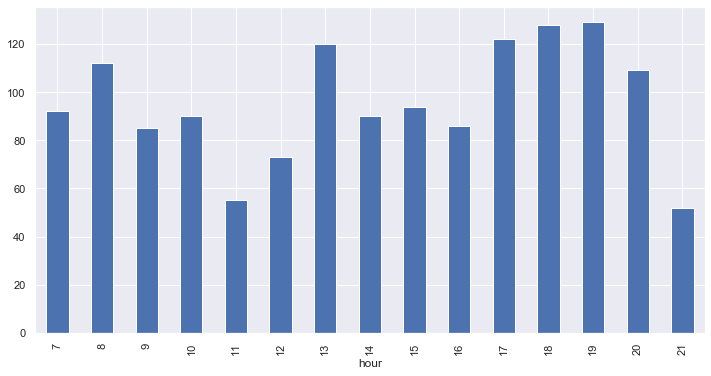

In [22]:
df[df['location'] == 'checkout'].groupby('hour')['customer_no'].count().plot.bar()

### Calculate the time each customer spent in the market

In [25]:
df

,timestamp,customer_no,location,hour,minute
date,,,,,
2019-09-02 07:03:00,2019-09-02 07:03:00,1,dairy,7,3
2019-09-02 07:03:00,2019-09-02 07:03:00,2,dairy,7,3
2019-09-02 07:04:00,2019-09-02 07:04:00,3,dairy,7,4
2019-09-02 07:04:00,2019-09-02 07:04:00,4,dairy,7,4
2019-09-02 07:04:00,2019-09-02 07:04:00,5,spices,7,4
...,...,...,...,...,...
2019-09-02 21:49:00,2019-09-02 21:49:00,1442,checkout,21,49
2019-09-02 21:49:00,2019-09-02 21:49:00,1444,checkout,21,49
2019-09-02 21:49:00,2019-09-02 21:49:00,1445,dairy,21,49


In [26]:
df2=df.groupby(['customer_no', 'timestamp', 'location']).sum()

In [27]:
df2

hour  minute
customer_no timestamp           location              
1           2019-09-02 07:03:00 dairy        7       3
            2019-09-02 07:05:00 checkout     7       5
2           2019-09-02 07:03:00 dairy        7       3
            2019-09-02 07:06:00 checkout     7       6
3           2019-09-02 07:04:00 dairy        7       4
...                                        ...     ...
1444        2019-09-02 21:48:00 spices      21      48
            2019-09-02 21:49:00 checkout    21      49
1445        2019-09-02 21:49:00 dairy       21      49
1446        2019-09-02 21:50:00 dairy       21      50
1447        2019-09-02 21:50:00 fruit       21      50

[4884 rows x 2 columns]

In [ ]:
Calculate the total number of customers present in the supermarket over time.

In [ ]:
Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).